In [77]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [55]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']
columns3 = ['psig','apsig','oil','gas','water']

In [56]:
df_raw = pd.read_csv('final.csv')

In [57]:
# df_sample = df_raw.iloc[:100]
df_sample = df_raw.copy()

In [58]:
# fill error data
df_sample = df_sample.ffill()

In [59]:
df_actual = df_sample.copy()

# Actual Data

In [60]:
df_actual.head()

,datetime,choke,psig,apsig,oil,gas,water
0,15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
1,15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
2,15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
3,15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
4,15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [61]:
# data type
df_actual.dtypes

datetime     object
choke         int64
psig          int64
apsig         int64
oil         float64
gas         float64
water       float64
dtype: object

In [62]:
# convert data type
df_actual[['choke']] = df_actual[['choke']].astype(float)
# df_actual[columns2]

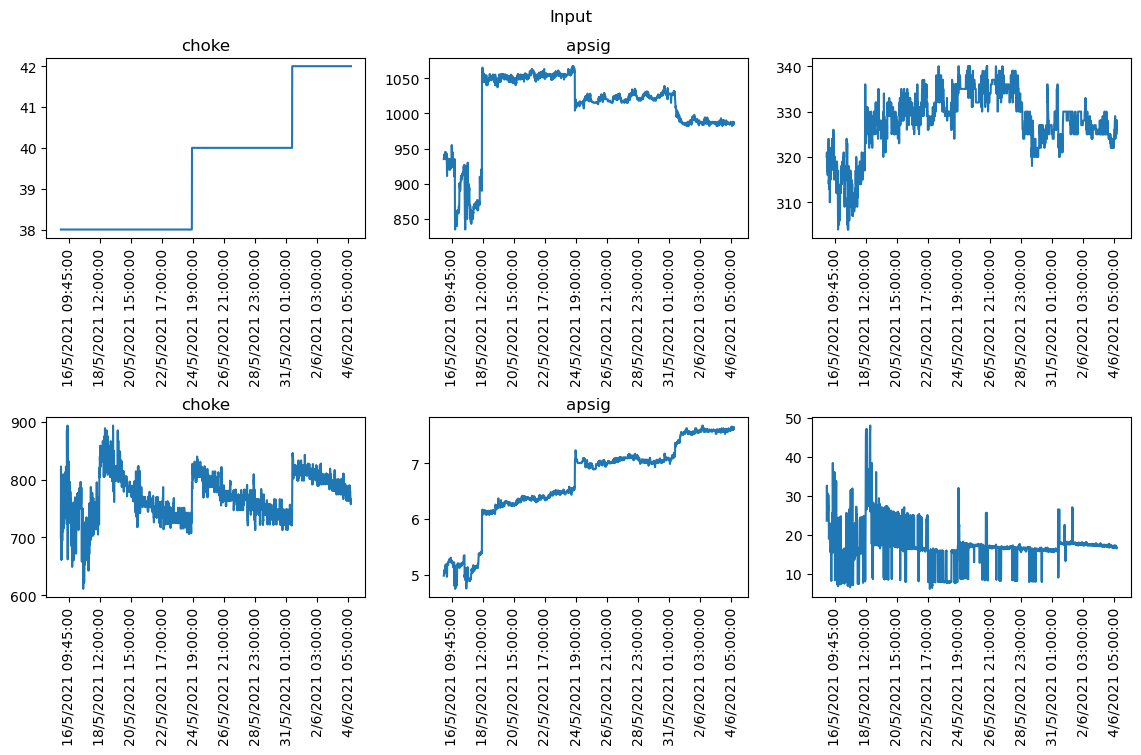

In [63]:
# plotting
fig, ax = plt.subplots(figsize=(14, 7), ncols=3, nrows=2)

ax[0][0].plot(df_actual['datetime'], df_actual['choke'])
ax[0][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][0].tick_params(axis='x', labelrotation=90)
ax[0][0].set_title('choke')

ax[0][1].plot(df_actual['datetime'], df_actual['psig'])
ax[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][1].tick_params(axis='x', labelrotation=90)
ax[0][1].set_title('psig')

ax[0][2].plot(df_actual['datetime'], df_actual['apsig'])
ax[0][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][2].tick_params(axis='x', labelrotation=90)
ax[0][1].set_title('apsig')

ax[1][0].plot(df_actual['datetime'], df_actual['oil'])
ax[1][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][0].tick_params(axis='x', labelrotation=90)
ax[1][0].set_title('choke')

ax[1][1].plot(df_actual['datetime'], df_actual['gas'])
ax[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_title('psig')

ax[1][2].plot(df_actual['datetime'], df_actual['water'])
ax[1][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][2].tick_params(axis='x', labelrotation=90)
ax[1][1].set_title('apsig')

fig.subplots_adjust(hspace=1)
fig.suptitle('Input', y=0.95)

plt.show()

In [64]:
df_sample = df_sample[columns2].astype(float)

In [65]:
df_sample[columns2].dtypes

choke    float64
psig     float64
apsig    float64
oil      float64
gas      float64
water    float64
dtype: object

In [66]:
# scaling normalization
min_params = df_sample[columns2].min()
max_params = df_sample[columns2].max()


df_normalized = df_sample.copy()
df_normalized[columns2] = (df_normalized[columns2] - min_params) / (max_params - min_params)

In [67]:
df_normalized.head()

,choke,psig,apsig,oil,gas,water
0,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
1,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
2,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
3,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
4,0.0,0.452586,0.416667,0.179187,0.113730,0.479358


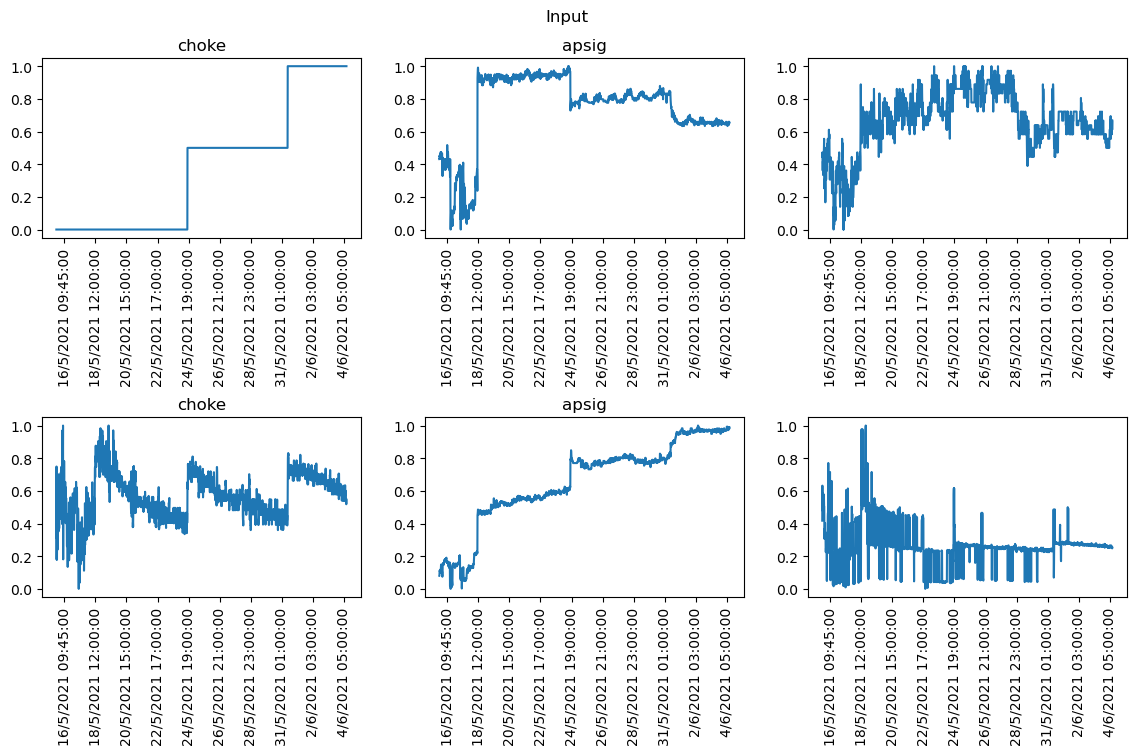

In [68]:
# normalized plot
# plotting
fig, ax = plt.subplots(figsize=(14, 7), ncols=3, nrows=2)

ax[0][0].plot(df_actual['datetime'], df_normalized['choke'])
ax[0][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][0].tick_params(axis='x', labelrotation=90)
ax[0][0].set_title('choke')

ax[0][1].plot(df_actual['datetime'], df_normalized['psig'])
ax[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][1].tick_params(axis='x', labelrotation=90)
ax[0][1].set_title('psig')

ax[0][2].plot(df_actual['datetime'], df_normalized['apsig'])
ax[0][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[0][2].tick_params(axis='x', labelrotation=90)
ax[0][1].set_title('apsig')

ax[1][0].plot(df_actual['datetime'], df_normalized['oil'])
ax[1][0].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][0].tick_params(axis='x', labelrotation=90)
ax[1][0].set_title('choke')

ax[1][1].plot(df_actual['datetime'], df_normalized['gas'])
ax[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_title('psig')

ax[1][2].plot(df_actual['datetime'], df_normalized['water'])
ax[1][2].xaxis.set_major_locator(mdates.DayLocator(interval=200))
ax[1][2].tick_params(axis='x', labelrotation=90)
ax[1][1].set_title('apsig')

fig.subplots_adjust(hspace=1)
fig.suptitle('Input', y=0.95)

plt.show()

In [69]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#  split 90% 10%
def split(df_data, train_ratio=0.9):
  data_len = df_data.shape[0]
  train_len = math.floor((data_len * train_ratio))

  data_train = df_data.iloc[:train_len,]
  data_test = df_data.iloc[train_len:,]

  return data_train, data_test

In [87]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)


In [88]:
n_past = 15
n_future = 5 
n_features = 6

In [89]:
data_train, data_test = split(df_normalized)

In [90]:
X_train, y_train = split_series(data_train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, svr_y_test = split_series(data_test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
svr_y_test = svr_y_test.reshape((svr_y_test.shape[0], svr_y_test.shape[1], n_features))

In [ ]:
look_back = 15

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [91]:
import keras
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = keras.layers.TimeDistributed(keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

2024-04-19 14:42:21.188497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-19 14:42:21.190979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-19 14:42:21.192788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 6)]      0           []                               
                                                                                                  
 lstm_22 (LSTM)                 [(None, 100),        42800       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector (RepeatVector)   (None, 5, 100)       0           ['lstm_22[0][0]']                
                                                                                              

2024-04-19 14:42:21.573590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-19 14:42:21.576014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-19 14:42:21.579226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [92]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = keras.layers.TimeDistributed(keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

2024-04-19 14:42:52.269417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-19 14:42:52.272199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-19 14:42:52.274166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 15, 6)]      0           []                               
                                                                                                  
 lstm_24 (LSTM)                 [(None, 15, 100),    42800       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_25 (LSTM)                 [(None, 100),        80400       ['lstm_24[0][0]']                
                                 (None, 100),                                               

2024-04-19 14:42:53.527209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-19 14:42:53.531357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-19 14:42:53.533890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [93]:
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,svr_y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,svr_y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])


2024-04-19 14:43:43.372118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-19 14:43:43.375155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-19 14:43:43.379157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [99]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

6/6 [==============================] - 0s 47ms/step


In [124]:
pd.DataFrame(pred_e1d1[0], columns=columns2)

,choke,psig,apsig,oil,gas,water
0,1.004498,0.669604,0.656949,0.674613,0.967837,0.267441
1,1.011639,0.664624,0.655741,0.674739,0.969059,0.269756
2,1.009181,0.666270,0.655164,0.673753,0.969175,0.269187
3,1.004658,0.668471,0.656177,0.674082,0.969022,0.268679
4,1.000248,0.670470,0.658692,0.675295,0.969498,0.268166


In [96]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
train = data_train
scalers={}
for i in data_train.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    # scalers['scaler_'+ i] = scaler
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = data_test
for i in data_train.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

/tmp/ipykernel_42638/3031821610.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s
/tmp/ipykernel_42638/3031821610.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s
/tmp/ipykernel_42638/3031821610.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [103]:
for index,i in enumerate(data_train.columns):
    scaler = scalers['scaler_'+i]
    # pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    # pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    svr_y_test[:,:,index]=scaler.inverse_transform(svr_y_test[:,:,index])


In [104]:
for index,i in enumerate(data_train.columns):
    scaler = scalers['scaler_'+i]
    # pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    # pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    svr_y_test[:,:,index]=scaler.inverse_transform(svr_y_test[:,:,index])

In [107]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(data_train.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(svr_y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(svr_y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
  print()
  print()

choke
Day  1 :
MAE-E1D1 :  0.0041704622246104585, MAE-E2D2 :  0.009642677546958247
Day  2 :
MAE-E1D1 :  0.005768220100177111, MAE-E2D2 :  0.0027266374001136194
Day  3 :
MAE-E1D1 :  0.004454644826742319, MAE-E2D2 :  0.002779021418306249
Day  4 :
MAE-E1D1 :  0.003261637052840735, MAE-E2D2 :  0.004720169058918248
Day  5 :
MAE-E1D1 :  0.005101120330878264, MAE-E2D2 :  0.012579405096155651


psig
Day  1 :
MAE-E1D1 :  0.007235939260454368, MAE-E2D2 :  0.01974578186872662
Day  2 :
MAE-E1D1 :  0.006884745081403589, MAE-E2D2 :  0.01774250308096932
Day  3 :
MAE-E1D1 :  0.007787904005297777, MAE-E2D2 :  0.019319533997714536
Day  4 :
MAE-E1D1 :  0.009114007868588729, MAE-E2D2 :  0.02179502356030508
Day  5 :
MAE-E1D1 :  0.010565889925159888, MAE-E2D2 :  0.02393793131813325


apsig
Day  1 :
MAE-E1D1 :  0.03702352040696502, MAE-E2D2 :  0.032458147745552515
Day  2 :
MAE-E1D1 :  0.03554153677509613, MAE-E2D2 :  0.03313358797202525
Day  3 :
MAE-E1D1 :  0.03625423856505743, MAE-E2D2 :  0.0343640334193914

# import from scratch

In [146]:
import lstm as lstmpy

In [147]:
df_normalized_result = df_normalized.copy()

In [149]:
lstm_model = lstmpy.LSTM(df_normalized,df_normalized_result, 3, 0.1)


TypeError: 'str' object cannot be interpreted as an integer

In [150]:
np.random.random((10, 10+10))

array([[0.33105183, 0.60575802, 0.09711296, 0.05830463, 0.2719569 ,
        0.37796238, 0.73433501, 0.5461724 , 0.77404377, 0.57540693,
        0.35717833, 0.40445468, 0.03361814, 0.45675854, 0.07958436,
        0.88491845, 0.05057686, 0.69783965, 0.88524319, 0.56618208],
       [0.38056097, 0.59763221, 0.18316221, 0.97663953, 0.63888043,
        0.16335025, 0.73266297, 0.3328344 , 0.73110101, 0.6336268 ,
        0.56976968, 0.98093558, 0.7564552 , 0.11486742, 0.33169212,
        0.35296856, 0.84579685, 0.38904598, 0.52456242, 0.01255671],
       [0.37698354, 0.24807176, 0.84304369, 0.92795426, 0.56285988,
        0.72304218, 0.41249414, 0.79716365, 0.10024041, 0.93989373,
        0.17048908, 0.1104912 , 0.93385088, 0.04824338, 0.58256935,
        0.3098389 , 0.32425291, 0.03032744, 0.47944119, 0.58085074],
       [0.72416917, 0.79298039, 0.67343211, 0.77310647, 0.51618767,
        0.43496439, 0.32796272, 0.17754044, 0.57759063, 0.91247703,
        0.33344718, 0.5889766 , 0.96909877, 0

# Support Vector Regressor

In [138]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape

In [135]:
# Convert to numpy arrays
svr_train_data = data_train.values
svr_test_data = data_test.values

In [126]:
timesteps = 5

In [130]:
# convert data to 2D tensor
train_data_timesteps = np.array([[j for j in svr_train_data[i:i+timesteps]] for i in range(0,len(svr_train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(1687, 5)

In [131]:
# convert test data to 2D tensor
test_data_timesteps = np.array([[j for j in svr_test_data[i:i+timesteps]] for i in range(0,len(svr_test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(184, 5)

In [132]:
svr_x_train, svr_y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
svr_x_test, svr_y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(svr_x_train.shape, svr_y_train.shape)
print(svr_x_test.shape, svr_y_test.shape)

(1687, 4) (1687, 1)
(184, 4) (184, 1)


In [139]:
svr_model = SVR(kernel='rbf', gamma=0.5, C=10, epsilon=0.05)

In [142]:
svr_model.fit(svr_x_train, svr_y_train[:,0])

ValueError: Input y contains NaN.

In [143]:
svr_y_train

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [nan]])